In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# GETTING DATA INFORMATION

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# DATA CLEANING

In [5]:
colums_drop = ['Name', 'Ticket','Fare','Cabin']
new_df = df.drop(colums_drop, axis=1)

In [6]:
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [7]:
new_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

In [8]:
mean_age = new_df['Age'].mean()
new_df['Age'].fillna(mean_age, inplace=True)

In [9]:
most_frequent_value = new_df['Embarked'].mode()[0]  
new_df['Embarked'].fillna(most_frequent_value, inplace=True)

In [10]:
new_df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df['Age'] = scaler.fit_transform(new_df[['Age']])
new_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,0.271174,1,0,S
1,2,1,1,female,0.472229,1,0,C
2,3,1,3,female,0.321438,0,0,S
3,4,1,1,female,0.434531,1,0,S
4,5,0,3,male,0.434531,0,0,S


In [12]:
new_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [13]:
new_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,0.271174,1,0,S
1,2,1,1,female,0.472229,1,0,C
2,3,1,3,female,0.321438,0,0,S
3,4,1,1,female,0.434531,1,0,S
4,5,0,3,male,0.434531,0,0,S


In [14]:
new_df["Sex"].replace({"male":"M","female":"F"},inplace=True)
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,M,0.271174,1,0,S
1,2,1,1,F,0.472229,1,0,C
2,3,1,3,F,0.321438,0,0,S
3,4,1,1,F,0.434531,1,0,S
4,5,0,3,M,0.434531,0,0,S


# ENCODING CATEGORICAL VALUES

In [15]:
from sklearn.preprocessing import OneHotEncoder # Encoding using one-hot sklearn function 
data = new_df["Embarked"]
df = pd.DataFrame(data)
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[['Embarked']])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Embarked']))
new_df = pd.concat([new_df, encoded_df], axis=1).drop(columns=['Embarked'])
new_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,M,0.271174,1,0,0.0,0.0,1.0
1,2,1,1,F,0.472229,1,0,1.0,0.0,0.0
2,3,1,3,F,0.321438,0,0,0.0,0.0,1.0
3,4,1,1,F,0.434531,1,0,0.0,0.0,1.0
4,5,0,3,M,0.434531,0,0,0.0,0.0,1.0


In [16]:
from sklearn.preprocessing import LabelEncoder  
label_encoder = LabelEncoder()
new_df['Sex'] = label_encoder.fit_transform(new_df['Sex'])

# LOOKING FOR OUTLIERS

<Axes: xlabel='Age'>

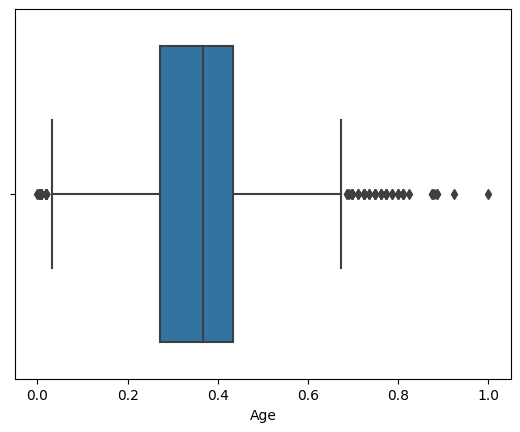

In [17]:
import seaborn as sns
sns.boxplot(x=new_df["Age"])

In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = new_df['Age'].quantile(0.25)
Q3 = new_df['Age'].quantile(0.75)
IQR = Q3 - Q1
# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2 = new_df[(new_df['Age'] >= lower_bound) & (new_df['Age'] <= upper_bound)]
df2.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0.271174,1,0,0.0,0.0,1.0
1,2,1,1,0,0.472229,1,0,1.0,0.0,0.0
2,3,1,3,0,0.321438,0,0,0.0,0.0,1.0
3,4,1,1,0,0.434531,1,0,0.0,0.0,1.0
4,5,0,3,1,0.434531,0,0,0.0,0.0,1.0


<Axes: xlabel='Age'>

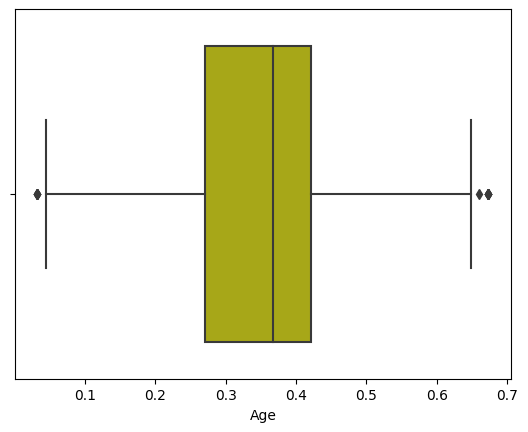

In [19]:
sns.boxplot(x=df2["Age"],color='y')

# SPLITTING DATA

In [20]:
from sklearn.model_selection import train_test_split
X = new_df.drop(columns='Survived')
y = new_df[['Survived']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
new_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

# IMPLEMENTING ALGORITHM AND CHECKING ACCURACY

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = log_reg.predict(X_test)
log_reg.score(X_test,y_test) * 100

80.22388059701493

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score , confusion_matrix ,roc_auc_score ,roc_curve
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100
cnf_mat = confusion_matrix(y_test,y_pred)
print('PRecision',precision)
print('Recall', recall)
print('F1 Score',f1)
print()
print()
print()
print("CONFUSION MATRIX:")
print(cnf_mat)

PRecision 79.0
Recall 71.17117117117117
F1 Score 74.88151658767774



CONFUSION MATRIX:
[[136  21]
 [ 32  79]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


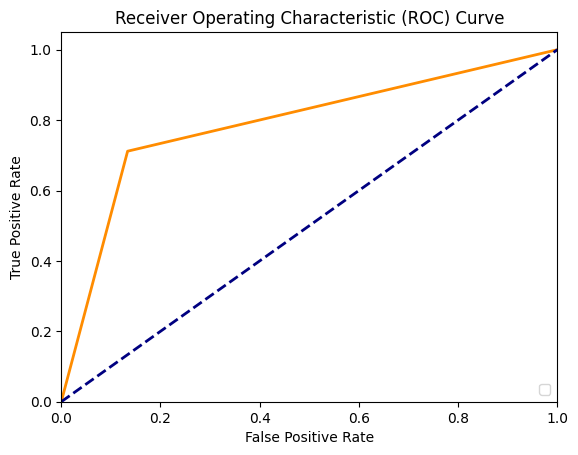

In [30]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()